In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/gld_price_data.csv')

In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#We will be predicting gold price
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
df.shape

(2290, 6)

In [ ]:
correlation=df.corr()

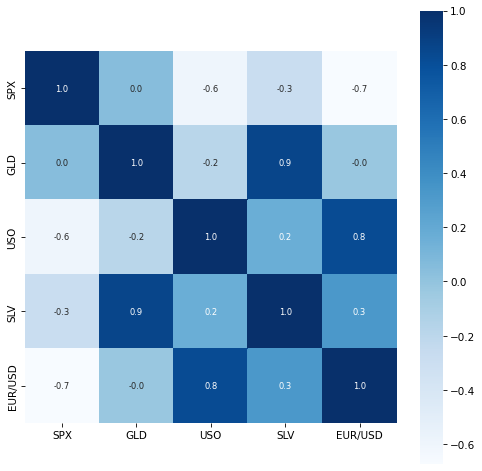

In [ ]:
plt.figure(figsize=(8,8), dpi=75)
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8},cmap='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


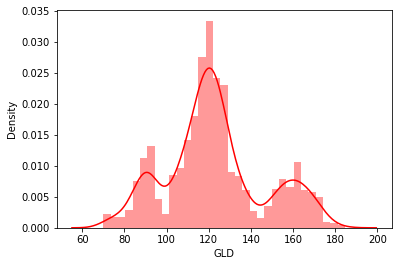

In [ ]:
sns.distplot(df['GLD'],color='red')

In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [ ]:
#spliting data
X=df.drop(['Date','GLD'],axis=1)
Y=df['GLD']

In [ ]:
print(X.shape,Y.shape)

(2290, 4) (2290,)


In [ ]:
train_X,test_X, train_Y, test_Y=train_test_split(X,Y,test_size=0.2,random_state=13)

In [ ]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape )

(1832, 4) (458, 4) (1832,) (458,)


In [ ]:
DT_model=tree.DecisionTreeClassifier()
train_Y.shape

(1832,)

In [ ]:
from sklearn import preprocessing
from sklearn import utils

In [ ]:
lab_enc = preprocessing.LabelEncoder()
encoded_Y = lab_enc.fit_transform(train_Y)

In [ ]:
print(train_Y)

194      79.750000
856     169.630005
1374    125.410004
615     136.029999
895     168.029999
           ...    
1780    107.690002
866     152.330002
74       87.220001
2224    128.070007
338      91.620003
Name: GLD, Length: 1832, dtype: float64


In [ ]:
print(encoded_Y)

[  33 1538  972 ...   92 1079  180]


In [ ]:
DT_model=DT_model.fit(train_X,encoded_Y)

In [ ]:
predictions=DT_model.predict(test_X)
print(predictions)

[ 209 1551 1583  957 1317  603  178  747  156  129 1028  907  827  717
  336 1076  203  289  743  815  699  745  482   36  965  126  701 1251
 1088  950 1054  435  897 1212 1190 1406  885  292 1406 1145  675 1365
 1075  837  166  811 1397  770  776  261  679  517 1148  591 1481 1353
  669  734  848 1024 1446  309  709  984 1068 1098 1424   60  907 1197
  366  788  856 1055  805  438 1252  205  457  782  971  305   30  700
 1476  382  371   88 1193 1371    0  106  653  552 1256  858   51  217
  406 1204  209  514  346 1155 1088 1388  516  859   34 1358  897 1284
  778 1420 1079 1410 1124  523 1318 1040 1546  681  284   68 1566  448
 1452  708 1379  700 1566  443  727  518  443  823 1005 1347 1362 1424
  154  434 1270 1208  495 1332  355  722 1113 1057  839  772  161 1111
  717 1314  192  751  406 1258  681  563 1257   54 1345 1290 1459 1361
  837 1249  108  341  534   17   45 1002 1134 1009  168  934  666  997
 1409 1076  290    0 1385 1575  491  809  740  396  722 1128  717  974
  649 

Text(0.5, 1.0, 'Original vs Predicted Values')

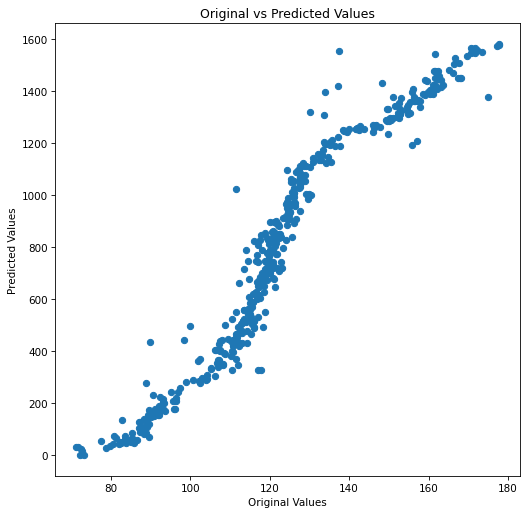

In [ ]:
plt.figure(figsize=(8,8),dpi=75)
plt.scatter(test_Y,predictions)
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.title("Original vs Predicted Values")
